# Task 1

___________________________________________________________________________________________________________________________

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

C:\ANA\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df._append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews
0,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,3.0,5.0,3.0,4.0,4.0,3,yes,NaN,✅ Trip Verified | Check in fast and friendly....
1,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3.0,1.0,1.0,2.0,2.0,1,no,1.0,✅ Trip Verified | This is the first time I ha...
2,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,5.0,1.0,1.0,5.0,5.0,3,no,1.0,✅ Trip Verified | Flew business class from Do...
3,A350,Solo Leisure,Business Class,London Heathrow to São Paulo,March 2024,4.0,4.0,5.0,5.0,4.0,4,yes,NaN,✅ Trip Verified | Starting off at Heathrow Te...
4,NaN,Couple Leisure,Economy Class,London Heathrow to Nice,March 2024,4.0,3.0,NaN,NaN,2.0,1,no,NaN,Not Verified | We have flown this route with ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Boeing 747,Couple Leisure,Economy Class,London Heathrow to Houston,April 2019,5.0,5.0,5.0,4.0,4.0,4,yes,NaN,✅ Trip Verified | London Heathrow to Houston....
996,A320,Business,Business Class,Larnaca to London,March 2019,1.0,4.0,4.0,NaN,3.0,1,no,NaN,Not Verified | Larnaca to London. This A320 i...
997,NaN,Solo Leisure,Economy Class,Zurich to London,April 2019,4.0,1.0,1.0,NaN,3.0,2,no,NaN,✅ Trip Verified | I booked my BA flight from ...
998,NaN,Solo Leisure,Economy Class,London to Pisa,April 2019,5.0,4.0,2.0,NaN,3.0,3,yes,NaN,✅ Trip Verified | The booking process was eas...


In [4]:
df.sample(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews
898,NaN,Solo Leisure,Economy Class,Seattle to Durban via London,July 2019,4.0,5.0,3.0,4.0,5.0,5,yes,NaN,✅ Trip Verified | Seattle to Durban via Londo...
94,A321 neo,Business,Economy Class,London Heathrow to Cairo,October 2023,3.0,5.0,3.0,NaN,5.0,2,yes,NaN,Not Verified | I flew London to Cairo and ret...
212,NaN,Solo Leisure,Economy Class,San Francisco to London,June 2023,NaN,NaN,NaN,NaN,1.0,1,no,NaN,✅ Trip Verified | The customer service is ugl...
343,NaN,Solo Leisure,Economy Class,London Heathrow to Bangkok via Doha,December 2022,2.0,2.0,2.0,2.0,1.0,1,no,NaN,✅ Trip Verified | Turned up 3.5 hours in advan...
853,A319 / Boeing777,Couple Leisure,Business Class,Glasgow to Tampa via Gatwick,September 2019,4.0,5.0,3.0,3.0,5.0,4,yes,NaN,✅ Trip Verified | Glasgow to Tampa via Gatwic...


In [5]:
df.to_csv("British_Airways_reviews.csv", index=False)

Now we have our dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
df = pd.read_csv('British_Airways_reviews.csv')

In [7]:
df.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity
count,914.000000,907.000000,785.000000,523.000000,943.000000,1000.000000,302.000000
mean,2.757112,3.178611,2.690446,2.810707,2.574761,2.395000,2.192053
std,1.383710,1.519943,1.481940,1.461026,1.542215,1.484985,1.506201
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df.shape

(1000, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                535 non-null    object 
 1   Type Of Traveller       998 non-null    object 
 2   Seat Type               1000 non-null   object 
 3   Route                   997 non-null    object 
 4   Date Flown              1000 non-null   object 
 5   Seat Comfort            914 non-null    float64
 6   Cabin Staff Service     907 non-null    float64
 7   Food & Beverages        785 non-null    float64
 8   Inflight Entertainment  523 non-null    float64
 9   Ground Service          943 non-null    float64
 10  Value For Money         1000 non-null   int64  
 11  Recommended             1000 non-null   object 
 12  Wifi & Connectivity     302 non-null    float64
 13  reviews                 1000 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory

## Data Cleaning

In [10]:
# work on removing the verifications
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

In [11]:
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews
0,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,3.0,5.0,3.0,4.0,4.0,3,yes,NaN,| Check in fast and friendly. Security a bre...
1,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3.0,1.0,1.0,2.0,2.0,1,no,1.0,| This is the first time I have seen the new...
2,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,5.0,1.0,1.0,5.0,5.0,3,no,1.0,| Flew business class from Doha to London on...
3,A350,Solo Leisure,Business Class,London Heathrow to São Paulo,March 2024,4.0,4.0,5.0,5.0,4.0,4,yes,NaN,| Starting off at Heathrow Terminal 3. Check...
4,NaN,Couple Leisure,Economy Class,London Heathrow to Nice,March 2024,4.0,3.0,NaN,NaN,2.0,1,no,NaN,We have flown this route with EasyJet regula...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Boeing 747,Couple Leisure,Economy Class,London Heathrow to Houston,April 2019,5.0,5.0,5.0,4.0,4.0,4,yes,NaN,| London Heathrow to Houston. Despite sittin...
996,A320,Business,Business Class,Larnaca to London,March 2019,1.0,4.0,4.0,NaN,3.0,1,no,NaN,Larnaca to London. This A320 is totally unsu...
997,NaN,Solo Leisure,Economy Class,Zurich to London,April 2019,4.0,1.0,1.0,NaN,3.0,2,no,NaN,| I booked my BA flight from Zurich to Londo...
998,NaN,Solo Leisure,Economy Class,London to Pisa,April 2019,5.0,4.0,2.0,NaN,3.0,3,yes,NaN,| The booking process was easy enough but th...


In [12]:
df.isna().sum()

Aircraft                  465
Type Of Traveller           2
Seat Type                   0
Route                       3
Date Flown                  0
Seat Comfort               86
Cabin Staff Service        93
Food & Beverages          215
Inflight Entertainment    477
Ground Service             57
Value For Money             0
Recommended                 0
Wifi & Connectivity       698
reviews                     0
dtype: int64

## Data Analysis

The wordcloud below indicates that flight, seat, service, and time are the most often mentioned subjects in customer reviews. demonstrating that individuals are engaged in conversation about their experiences with the staff and the aircraft.

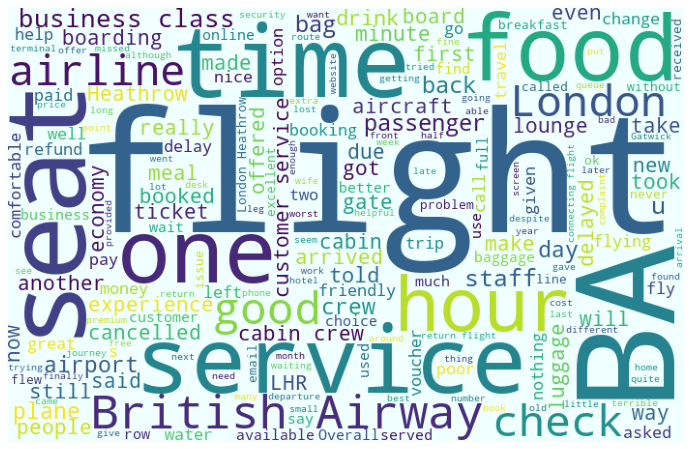

In [13]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 700, height = 450, background_color = 'azure').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

### Route Analysis

From a route analysis, we can identify the locations that the majority of our consumers adore as well as their levels of satisfaction and  we can then work to improve their experience.

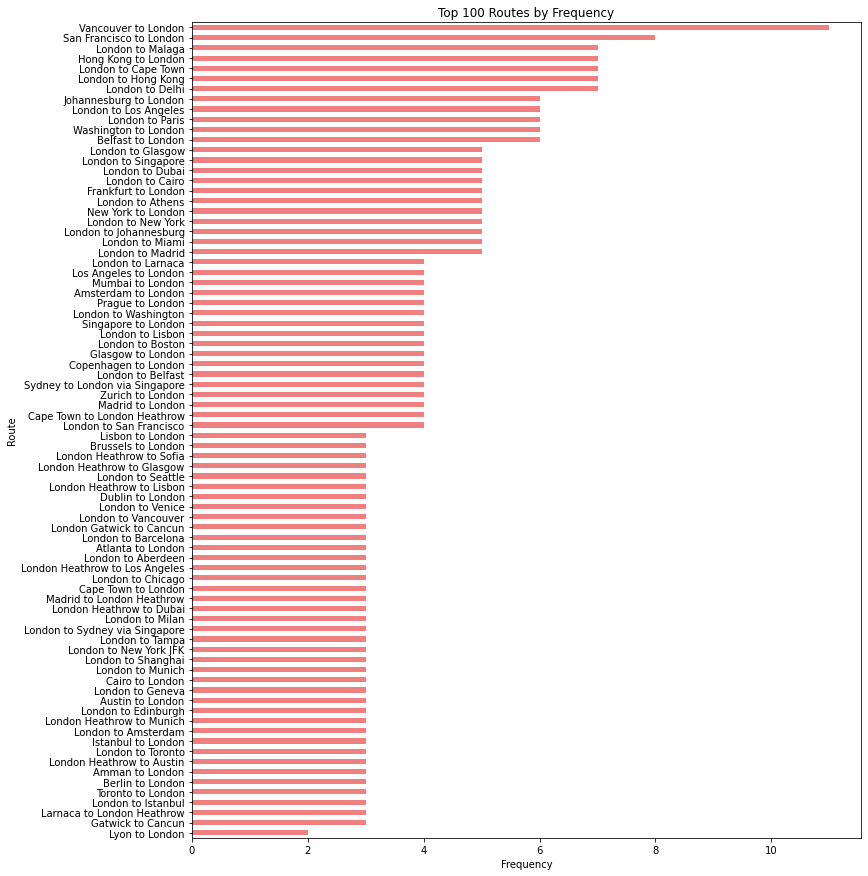

In [14]:
top_routes = df['Route'].value_counts().nlargest(80)

plt.figure(figsize=(12, 15))
top_routes.sort_values().plot(kind='barh', color='lightcoral')
plt.xlabel('Frequency')
plt.ylabel('Route')
plt.title('Top 100 Routes by Frequency')
plt.show()

### Satisfaction Of Customer

From the pie chart below, we know that 67.00% of passengers are dissatisfied with British Airways services. 

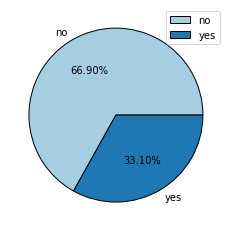

In [15]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette("Paired"),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

### View rating of British Airways service by passenger who are dissatisfied with British Airways

In [16]:
df_s = df[df['Recommended'] == 'no']
df_s.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Wifi & Connectivity
count,584.000000,577.000000,475.000000,328.000000,613.000000,669.000000,196.000000
mean,2.101027,2.424610,1.863158,2.201220,1.804241,1.530643,1.484694
std,1.105917,1.316937,1.067456,1.242371,1.174699,0.832194,0.947207
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Recommened vs not recommended

A pie chart to visualize the proportion of customers who recommend British Airways and who do not recommend British Airways

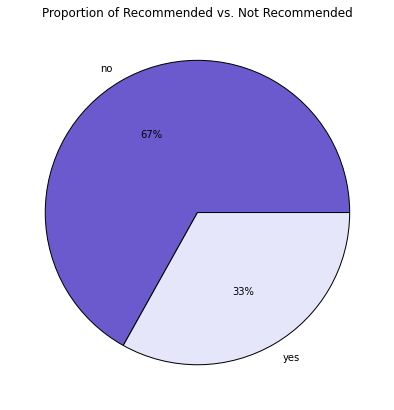

In [17]:
#Recommened vs not recommended
plt.figure(figsize=(7, 7))
df['Recommended'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['slateblue', 'lavender'], wedgeprops={"edgecolor":"k"},)
plt.title('Proportion of Recommended vs. Not Recommended')
plt.ylabel('')
plt.show()

### Seat Comfort Ratings vs. Value For Money Ratings

Below we have a boxplot to compare ratings for Seat Comfort and Value For Money to see their impact on overall satisfaction

<ipython-input-18-78475e938313>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Seat Comfort', y='Value For Money', data=df, palette='viridis')


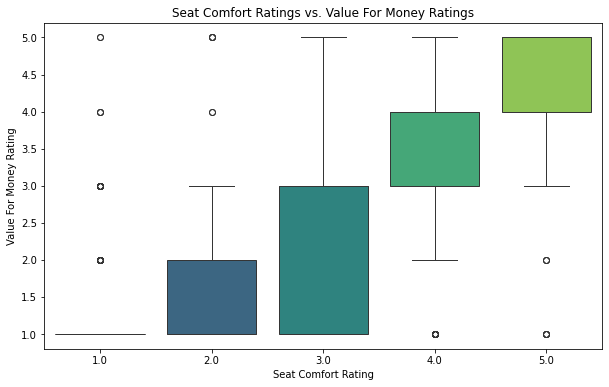

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Seat Comfort', y='Value For Money', data=df, palette='viridis')
plt.xlabel('Seat Comfort Rating')
plt.ylabel('Value For Money Rating')
plt.title('Seat Comfort Ratings vs. Value For Money Ratings')
plt.show()

### Correlation Heatmap

We can see that there is a strong positive correlation between the amenities that clients love and the correlation heatmap above.Our consumers tend to appreciate our offerings more when the plane has higher-quality facilities.

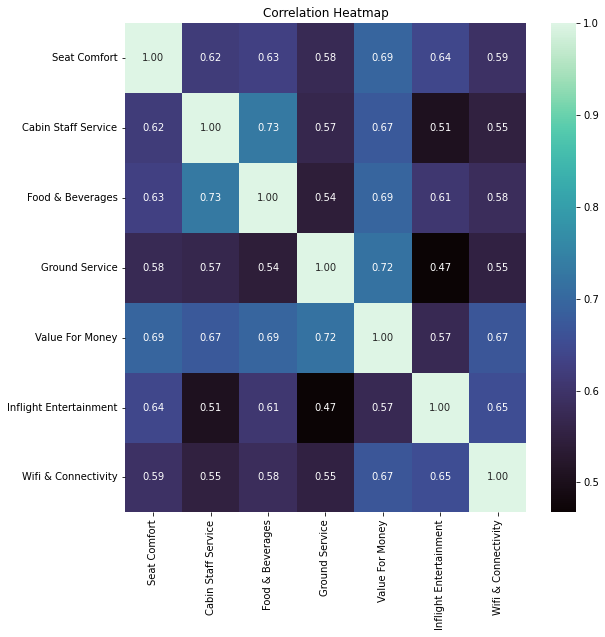

In [19]:
import seaborn as sns
correlation_data = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Value For Money', 'Inflight Entertainment', 'Wifi & Connectivity']].corr()
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_data, annot=True, cmap='mako', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

##  Obtaining the stem words

A word's stem is the portion that gives it its lexical meaning. The two methods most often used to determine the root or stem of a word are lemmatization and stemming.

The main distinction is that whereas stemming essentially removes some characters at the end, it frequently yields some worthless root words. Lemmatization produces meaningful root words, but it necessitates the word POS tags.

In [20]:
!pip install nltk

In [21]:
#Cleaning the text
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews,Cleaned Reviews
0,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,3.0,5.0,3.0,4.0,4.0,3,yes,NaN,| Check in fast and friendly. Security a bre...,Check in fast and friendly Security a breeze ...
1,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3.0,1.0,1.0,2.0,2.0,1,no,1.0,| This is the first time I have seen the new...,This is the first time I have seen the new Cl...
2,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,5.0,1.0,1.0,5.0,5.0,3,no,1.0,| Flew business class from Doha to London on...,Flew business class from Doha to London on st...
3,A350,Solo Leisure,Business Class,London Heathrow to São Paulo,March 2024,4.0,4.0,5.0,5.0,4.0,4,yes,NaN,| Starting off at Heathrow Terminal 3. Check...,Starting off at Heathrow Terminal Check in wa...
4,NaN,Couple Leisure,Economy Class,London Heathrow to Nice,March 2024,4.0,3.0,NaN,NaN,2.0,1,no,NaN,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...


In [22]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nitya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nitya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nitya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nitya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nitya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews,Cleaned Reviews,POS tagged
0,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,3.0,5.0,3.0,4.0,4.0,3,yes,NaN,| Check in fast and friendly. Security a bre...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi..."
1,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3.0,1.0,1.0,2.0,2.0,1,no,1.0,| This is the first time I have seen the new...,This is the first time I have seen the new Cl...,"[(first, a), (time, n), (seen, v), (new, a), (..."
2,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,5.0,1.0,1.0,5.0,5.0,3,no,1.0,| Flew business class from Doha to London on...,Flew business class from Doha to London on st...,"[(Flew, n), (business, n), (class, n), (Doha, ..."
3,A350,Solo Leisure,Business Class,London Heathrow to São Paulo,March 2024,4.0,4.0,5.0,5.0,4.0,4,yes,NaN,| Starting off at Heathrow Terminal 3. Check...,Starting off at Heathrow Terminal Check in wa...,"[(Starting, v), (Heathrow, n), (Terminal, n), ..."
4,NaN,Couple Leisure,Economy Class,London Heathrow to Nice,March 2024,4.0,3.0,NaN,NaN,2.0,1,no,NaN,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...,"[(flown, v), (route, n), (EasyJet, n), (regula..."


In [24]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews,Cleaned Reviews,POS tagged,Lemma
0,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,3.0,5.0,3.0,4.0,4.0,3,yes,NaN,| Check in fast and friendly. Security a bre...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi...",Check fast friendly Security breeze Lounge b...
1,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3.0,1.0,1.0,2.0,2.0,1,no,1.0,| This is the first time I have seen the new...,This is the first time I have seen the new Cl...,"[(first, a), (time, n), (seen, v), (new, a), (...",first time see new Club World suite seat com...
2,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,5.0,1.0,1.0,5.0,5.0,3,no,1.0,| Flew business class from Doha to London on...,Flew business class from Doha to London on st...,"[(Flew, n), (business, n), (class, n), (Doha, ...",Flew business class Doha London st March ser...
3,A350,Solo Leisure,Business Class,London Heathrow to São Paulo,March 2024,4.0,4.0,5.0,5.0,4.0,4,yes,NaN,| Starting off at Heathrow Terminal 3. Check...,Starting off at Heathrow Terminal Check in wa...,"[(Starting, v), (Heathrow, n), (Terminal, n), ...",Starting Heathrow Terminal Check fairly easy...
4,NaN,Couple Leisure,Economy Class,London Heathrow to Nice,March 2024,4.0,3.0,NaN,NaN,2.0,1,no,NaN,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...,"[(flown, v), (route, n), (EasyJet, n), (regula...",fly route EasyJet regularly twenty year age ...


In [25]:
df[['reviews','Lemma']]

,reviews,Lemma
0,| Check in fast and friendly. Security a bre...,Check fast friendly Security breeze Lounge b...
1,| This is the first time I have seen the new...,first time see new Club World suite seat com...
2,| Flew business class from Doha to London on...,Flew business class Doha London st March ser...
3,| Starting off at Heathrow Terminal 3. Check...,Starting Heathrow Terminal Check fairly easy...
4,We have flown this route with EasyJet regula...,fly route EasyJet regularly twenty year age ...
...,...,...
995,| London Heathrow to Houston. Despite sittin...,London Heathrow Houston Despite sit back pla...
996,Larnaca to London. This A320 is totally unsu...,Larnaca London totally unsuitable flight len...
997,| I booked my BA flight from Zurich to Londo...,book BA flight Zurich London Heathrow use Av...
998,| The booking process was easy enough but th...,booking process easy enough reduce baggage a...


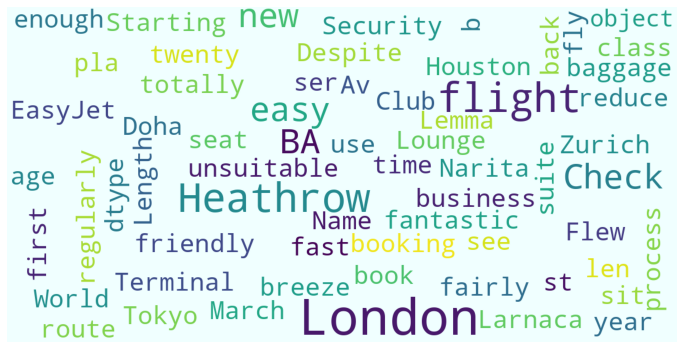

In [26]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='azure',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

## Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [27]:
!pip install vaderSentiment

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Value For Money,Recommended,Wifi & Connectivity,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Boeing 787,Business,Business Class,London Heathrow to Mumbai,March 2024,3.0,5.0,3.0,4.0,4.0,3,yes,NaN,| Check in fast and friendly. Security a bre...,Check in fast and friendly Security a breeze ...,"[(Check, n), (fast, n), (friendly, a), (Securi...",Check fast friendly Security breeze Lounge b...,0.9717,Positive
1,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,3.0,1.0,1.0,2.0,2.0,1,no,1.0,| This is the first time I have seen the new...,This is the first time I have seen the new Cl...,"[(first, a), (time, n), (seen, v), (new, a), (...",first time see new Club World suite seat com...,0.8020,Positive
2,Boeing 777-200,Couple Leisure,Business Class,Doha to London Heathrow,March 2024,5.0,1.0,1.0,5.0,5.0,3,no,1.0,| Flew business class from Doha to London on...,Flew business class from Doha to London on st...,"[(Flew, n), (business, n), (class, n), (Doha, ...",Flew business class Doha London st March ser...,0.1779,Neutral
3,A350,Solo Leisure,Business Class,London Heathrow to São Paulo,March 2024,4.0,4.0,5.0,5.0,4.0,4,yes,NaN,| Starting off at Heathrow Terminal 3. Check...,Starting off at Heathrow Terminal Check in wa...,"[(Starting, v), (Heathrow, n), (Terminal, n), ...",Starting Heathrow Terminal Check fairly easy...,0.9969,Positive
4,NaN,Couple Leisure,Economy Class,London Heathrow to Nice,March 2024,4.0,3.0,NaN,NaN,2.0,1,no,NaN,We have flown this route with EasyJet regula...,We have flown this route with EasyJet regular...,"[(flown, v), (route, n), (EasyJet, n), (regula...",fly route EasyJet regularly twenty year age ...,0.9847,Positive


In [29]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    481
Negative    411
Neutral     108
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1d4b2bf4cd0>,
 [Text(0.06562028214553672, 1.0980409730839467, 'Positive'),
  Text(-0.42732873930062687, -1.013602559471777, 'Negative'),
  Text(1.2730372826016982, -0.44930621752440103, 'Neutral')],
 [Text(0.03579288117029275, 0.5989314398639708, '48.1%'),
  Text(-0.23308840325488736, -0.5528741233482419, '41.1%'),
  Text(0.8015419927492173, -0.2828965073301784, '10.8%')])

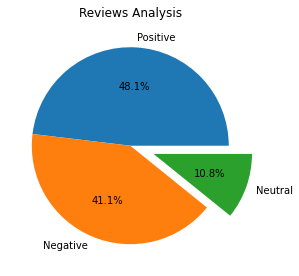

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

C:\ANA\lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


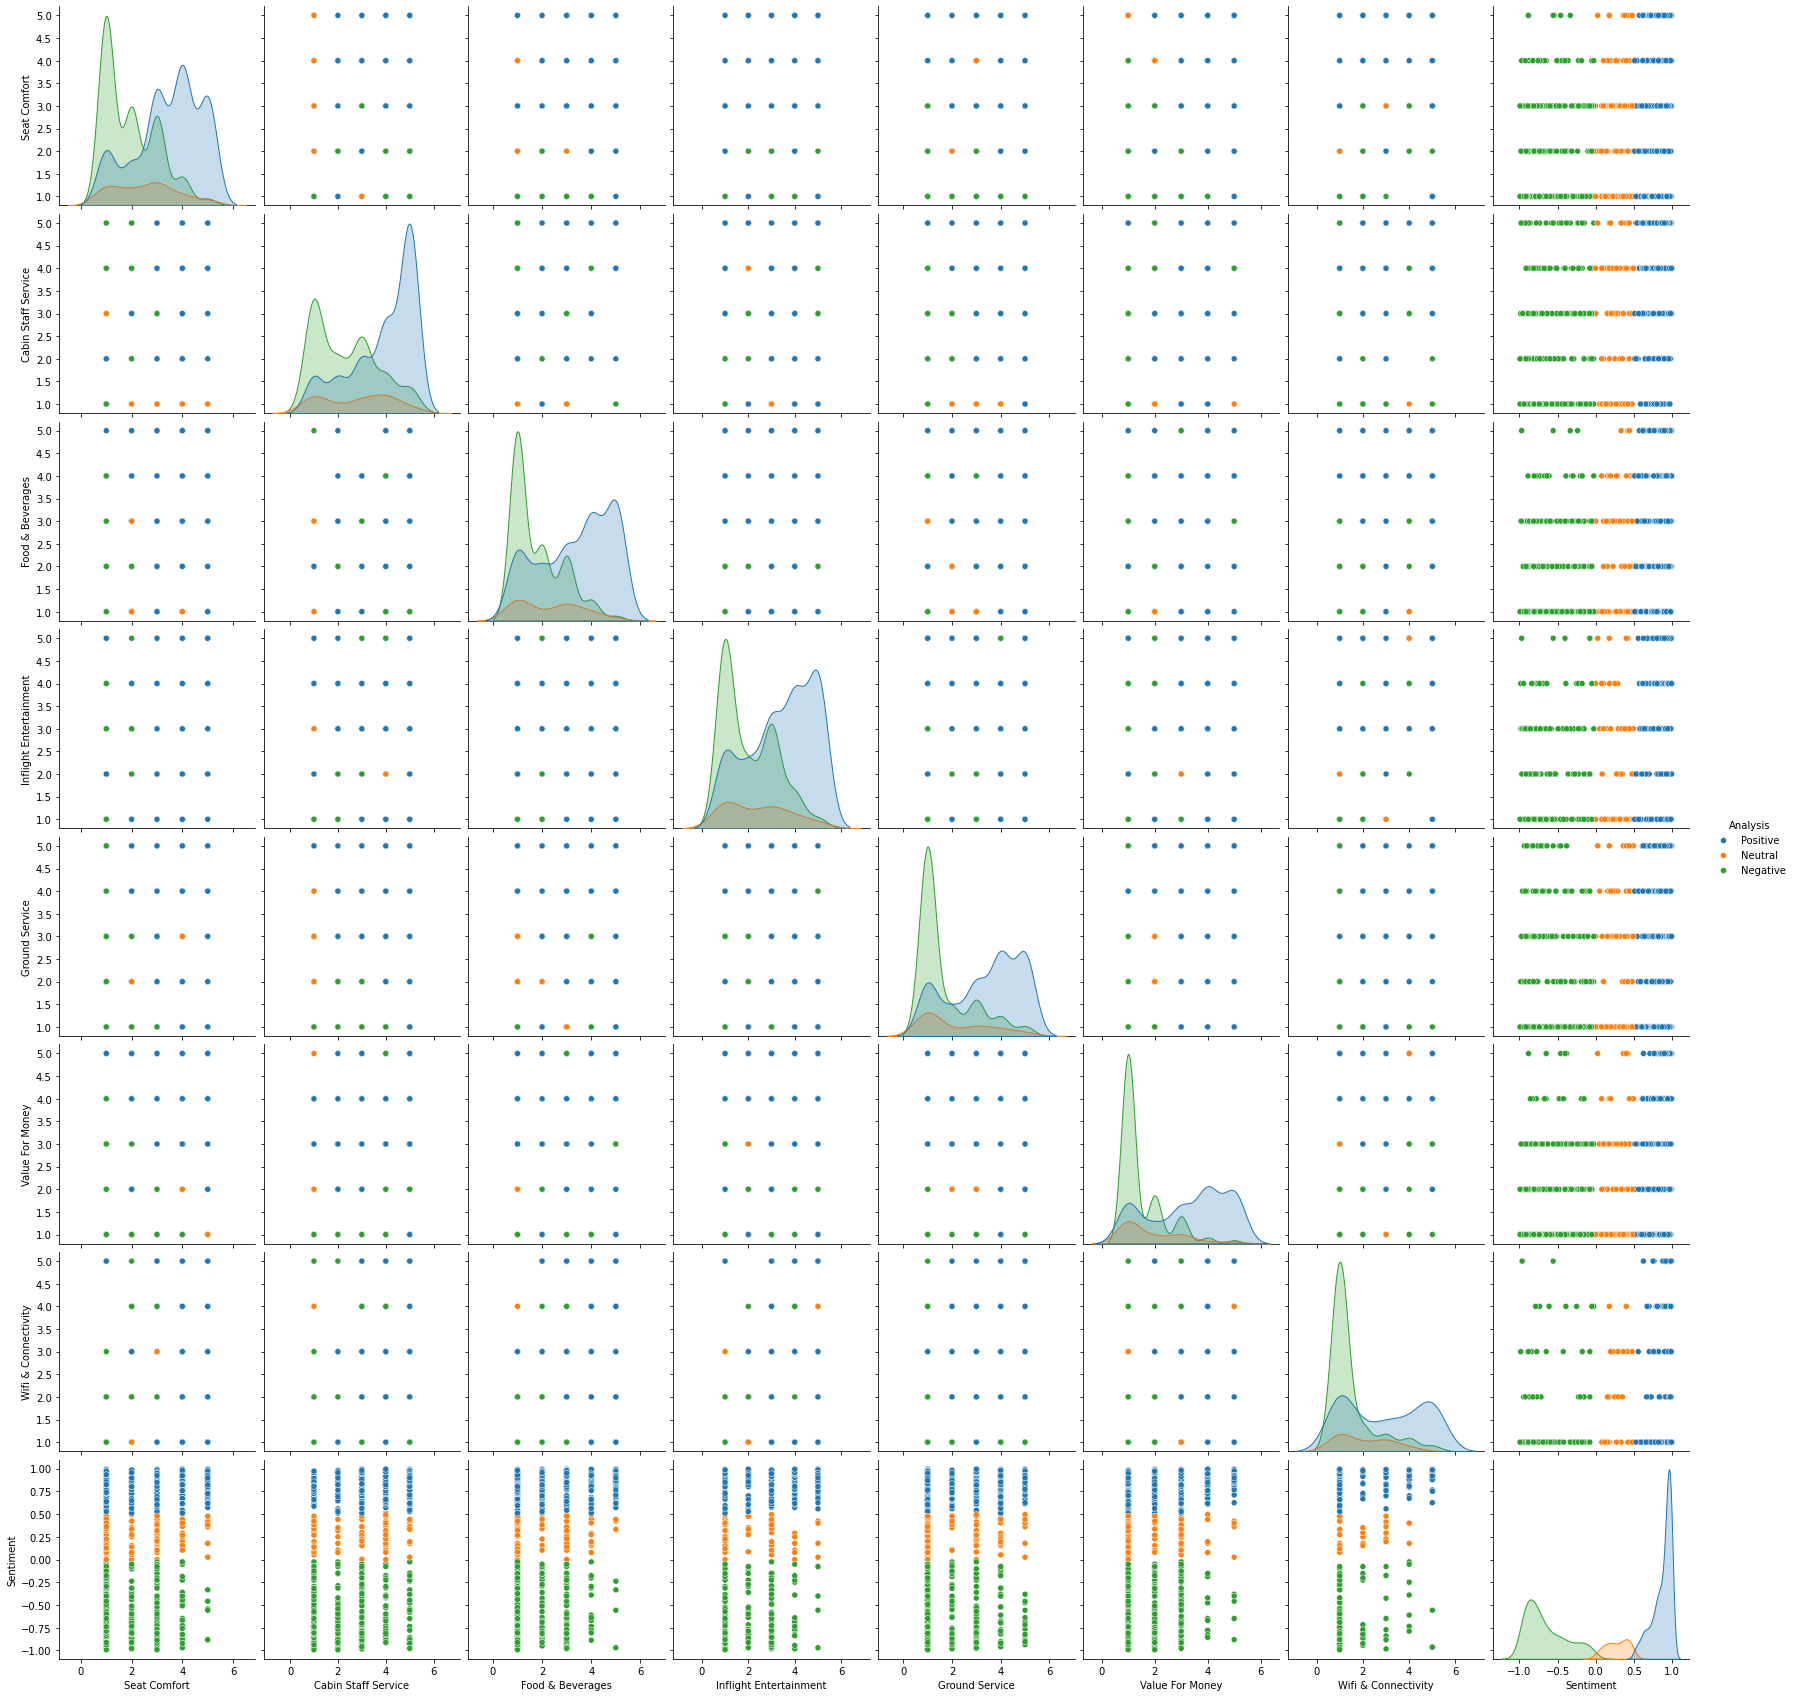

In [31]:
sns.pairplot(df.drop("Aircraft", axis=1), hue="Analysis", size=3)